
🎯 Accuracy: 87.23%

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.88      0.87      1556
    Positive       0.89      0.86      0.88      1717

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273



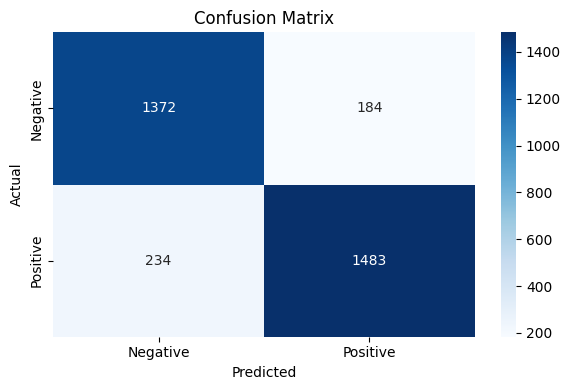

💬 "I absolutely loved the product!" → Positive
💬 "Worst experience ever." → Negative
💬 "It was okay, not great." → Positive


In [4]:
# ✅ 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 2. Load Dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

# ✅ 3. Select and Clean Data
df = df[['text', 'sentiment']]
df = df[df['sentiment'].isin(['positive', 'negative'])]  # remove neutral
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # encode target

# ✅ 4. Split Data
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅ 6. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# ✅ 7. Evaluate
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# ✅ 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ✅ 9. Predict on Custom Samples
samples = ["I absolutely loved the product!", "Worst experience ever.", "It was okay, not great."]
sample_vec = vectorizer.transform(samples)
sample_preds = model.predict(sample_vec)

for text, pred in zip(samples, sample_preds):
    print(f"💬 \"{text}\" → {'Positive' if pred == 1 else 'Negative'}")
